In [60]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import torchvision.transforms.functional as tF
import numpy as np
import torch.optim as optim 
import torch.nn as nn
import torch.nn.functional as F

In [61]:
def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = tF.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [62]:
tfs = transforms.Compose([
    transforms.ToTensor()
])

In [63]:
mnist = datasets.MNIST("C:/data",download=True,transform=tfs,train = True)

In [64]:
mnist_loader = torch.utils.data.DataLoader(mnist,batch_size=4)

In [65]:
a = iter(mnist_loader).next()[0]

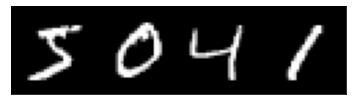

In [66]:
show(make_grid(a))

In [221]:
i = a[0]
i.shape

torch.Size([1, 28, 28])

In [222]:
i = torch.unsqueeze(i,0)

In [203]:
class model(nn.Module):
    def __init__(self):
        super().__init__()
        self.comp = nn.Sequential(
            nn.Conv2d(1,6,3),
            nn.MaxPool2d(2,2),
            nn.Conv2d(6,12,3)
        )

        self.decomp = nn.Sequential(
            nn.ConvTranspose2d(12,6,7,2,0),
            nn.BatchNorm2d(6),
            nn.LeakyReLU(True),
            nn.ConvTranspose2d(6,3,5,1,1),
            nn.BatchNorm2d(3),
            nn.LeakyReLU(True),
            nn.ConvTranspose2d(3,1,2,1,1),
            nn.LeakyReLU(True),
           

        )
    def forward(self,x):
        x =  self.comp(x)
        return self.decomp(x)

In [204]:
m  = model()

In [206]:
optimizer = optim.Adam(m.parameters(),lr=0.0003)

In [207]:
loss_fn = nn.MSELoss()

In [214]:
b = iter(mnist_loader).next()
o = m(b[0])

In [216]:
loss_fn(b[0],o)

tensor(0.5626, grad_fn=<MseLossBackward>)

In [224]:
epochs = 1

for e in range(epochs):
    m.zero_grad()
    for i, data in enumerate(mnist_loader):
        x = data[0]
        step = i

        model_out = m(x)
        loss_val = loss_fn(x,model_out)

        loss_val.backward()
        optimizer.step()

        print(f"Epoch {e}/{step} loss loss {loss_val.item()}")

Epoch 0/0 loss loss 0.052098046988248825
Epoch 0/1 loss loss 0.05726343393325806
Epoch 0/2 loss loss 0.051276519894599915
Epoch 0/3 loss loss 0.0597522146999836
Epoch 0/4 loss loss 0.06078024208545685
Epoch 0/5 loss loss 0.06286140531301498
Epoch 0/6 loss loss 0.07098063081502914
Epoch 0/7 loss loss 0.07062440365552902
Epoch 0/8 loss loss 0.06407102197408676
Epoch 0/9 loss loss 0.06988214701414108
Epoch 0/10 loss loss 0.06445244699716568
Epoch 0/11 loss loss 0.076693095266819
Epoch 0/12 loss loss 0.07585997134447098
Epoch 0/13 loss loss 0.073397696018219
Epoch 0/14 loss loss 0.07445655763149261
Epoch 0/15 loss loss 0.07726913690567017
Epoch 0/16 loss loss 0.07006954401731491
Epoch 0/17 loss loss 0.07807169109582901
Epoch 0/18 loss loss 0.06935274600982666
Epoch 0/19 loss loss 0.062366947531700134
Epoch 0/20 loss loss 0.08478928357362747
Epoch 0/21 loss loss 0.07475589960813522
Epoch 0/22 loss loss 0.074404776096344
Epoch 0/23 loss loss 0.06977314502000809
Epoch 0/24 loss loss 0.0614488

In [242]:
inp = iter(mnist_loader).next()[0][0]
inp.shape

torch.Size([1, 28, 28])

In [243]:
inp = torch.unsqueeze(inp,0)
inp.shape


torch.Size([1, 1, 28, 28])

In [245]:
inp_out = m(inp)

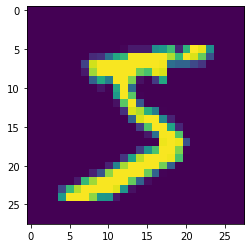

In [246]:
plt.imshow(inp[0][0])

In [249]:
inp_out = inp_out.detach().numpy()

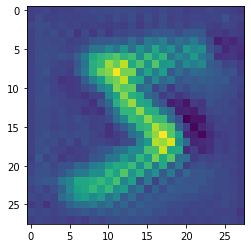

In [250]:
plt.imshow(inp_out[0][0])